In [1]:
import pandas as pd

# Đọc file CSV

df = pd.read_csv("train.csv")

# Kiểm tra số lượng dòng và cột
num_rows, num_cols = df.shape
print(f"Số lượng dòng: {num_rows}, Số lượng cột: {num_cols}")

Số lượng dòng: 70000, Số lượng cột: 2


In [2]:
# Hiển thị 5 dòng đầu tiên
print(df.head())

  labels                                               text
0     pt  os chefes de defesa da estónia, letónia, lituâ...
1     bg  размерът на хоризонталната мрежа може да бъде ...
2     zh  很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3     th  สำหรับ ของเก่า ที่ จริงจัง ลอง   honeychurch  ...
4     ru                             Он увеличил давление .


In [18]:
# Kiểm tra số lượng giá trị null trong từng cột
missing_values = df.isnull().sum()
print("Số lượng giá trị null trong từng cột:\n", missing_values)

# Nếu có giá trị null, tiến hành xử lý
if missing_values.sum() > 0:
    print("=> Phát hiện dữ liệu thiếu, tiến hành xử lý...")
    
    # Cách xử lý: Xóa các dòng chứa giá trị null
    df = df.dropna()
    
    # Kiểm tra lại sau khi xử lý
    print("Dữ liệu sau khi xử lý giá trị null:\n", df.isnull().sum())
else:
    print("Không có dữ liệu thiếu.")

Số lượng giá trị null trong từng cột:
 labels    0
text      0
dtype: int64
Không có dữ liệu thiếu.


In [4]:
# Kiểm tra số lượng dòng trùng lặp
num_duplicates = df.duplicated().sum()
print(f"Số lượng dòng trùng lặp: {num_duplicates}")

# Nếu có dữ liệu trùng lặp, tiến hành xử lý
if num_duplicates > 0:
    print("=> Phát hiện dữ liệu trùng lặp, tiến hành xử lý...")
    
    # Xóa các dòng trùng lặp
    df = df.drop_duplicates()
    
    # Kiểm tra lại sau khi xử lý
    print(f"Số lượng dòng sau khi loại bỏ trùng lặp: {df.shape[0]}")
else:
    print("Không có dữ liệu trùng lặp.")

Số lượng dòng trùng lặp: 1020
=> Phát hiện dữ liệu trùng lặp, tiến hành xử lý...
Số lượng dòng sau khi loại bỏ trùng lặp: 68980


In [5]:
# Đếm số lượng ngôn ngữ khác nhau
num_languages = df['labels'].nunique()
print(f"Số lượng ngôn ngữ khác nhau: {num_languages}")

Số lượng ngôn ngữ khác nhau: 20


Top 10 ngôn ngữ có số lượng mẫu nhiều nhất:
 labels
ja    3500
en    3499
de    3499
es    3498
fr    3495
zh    3491
vi    3464
hi    3464
bg    3464
ar    3464
Name: count, dtype: int64


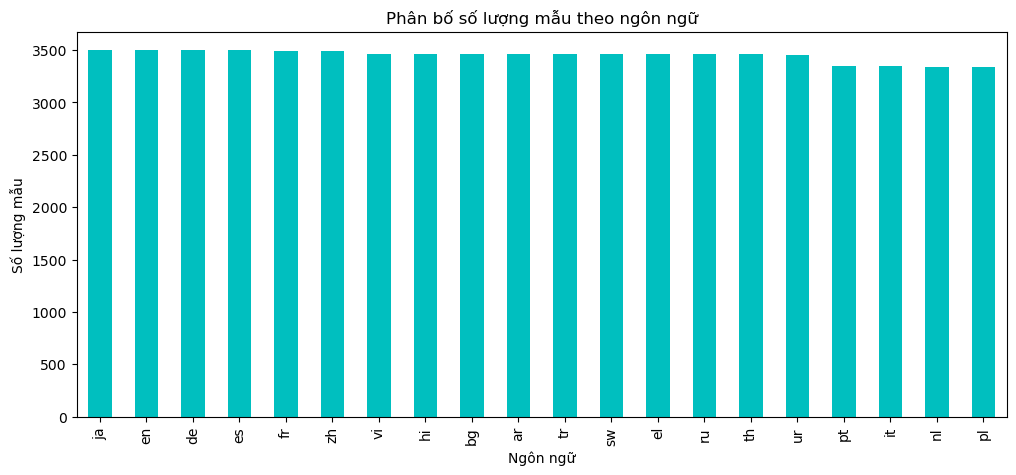

In [6]:
import matplotlib.pyplot as plt

# Đếm số lượng mẫu của từng ngôn ngữ
language_counts = df['labels'].value_counts()

# Hiển thị top 10 ngôn ngữ phổ biến nhất
print("Top 10 ngôn ngữ có số lượng mẫu nhiều nhất:\n", language_counts.head(10))

# Vẽ biểu đồ phân bố
plt.figure(figsize=(12, 5))
language_counts.plot(kind='bar', color='c')
plt.xlabel("Ngôn ngữ")
plt.ylabel("Số lượng mẫu")
plt.title("Phân bố số lượng mẫu theo ngôn ngữ")
plt.xticks(rotation=90)
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:

# Tách dữ liệu thành các đặc trưng và nhãn
X = df["text"]
y = df["labels"]

X_train, X_test, y_train, y_
# Chia dữ liệu thành tập huấn luyện và kiểm tratest = train_test_split(X, y, test_size=0.2, random_state=42)

# Dùng TF-IDF char n-gram (Không cần tiền xử lý)
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [9]:
# Huấn luyện mô hình SVM với khả năng dự đoán xác suất
model = SVC(kernel='linear', probability=True)
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', probability=True)

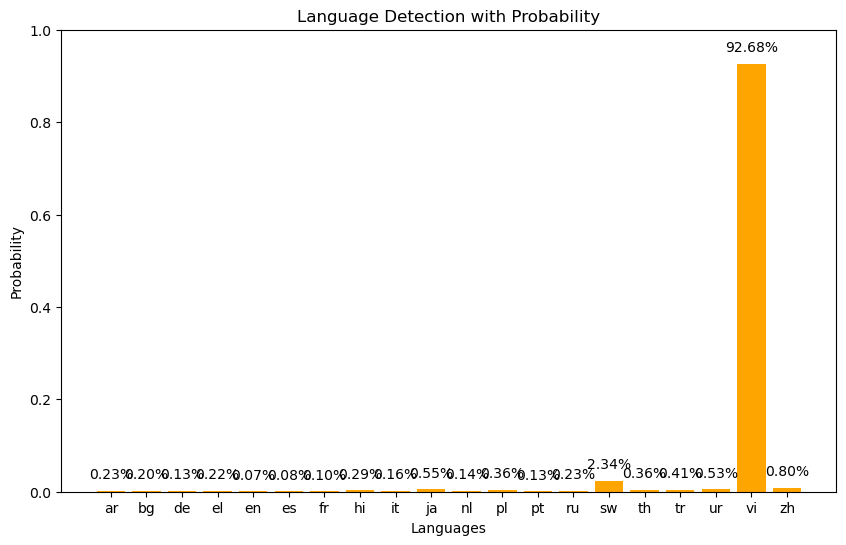

In [17]:
# Nhập văn bản từ người dùng
user_input = input("Enter a Text: ")

# Tiền xử lý và dự đoán ngôn ngữ
data = vectorizer.transform([user_input]).toarray()  # Biến đổi văn bản thành vector

# Dự đoán xác suất của các ngôn ngữ
probs = model.predict_proba(data)  # Lấy xác suất cho các lớp

# Lấy tỉ lệ phần trăm của các ngôn ngữ
languages = model.classes_
language_probabilities = probs[0]  # Dự đoán cho văn bản người dùng

# Vẽ biểu đồ phần trăm ngôn ngữ
plt.figure(figsize=(10, 6))
plt.bar(languages, language_probabilities, color='orange')
plt.xlabel('Languages')
plt.ylabel('Probability')
plt.title('Language Detection with Probability')
plt.ylim(0, 1)

# Hiển thị phần trăm cho mỗi ngôn ngữ
for i, v in enumerate(language_probabilities):
    plt.text(i, v + 0.02, f'{v*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

In [19]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Đọc tập dữ liệu kiểm tra (test.csv)
test_df = pd.read_csv('test.csv')

# Tách dữ liệu và nhãn từ tập kiểm tra
X_test_data = test_df['text']
y_test_data = test_df['labels']

# Biến đổi dữ liệu kiểm tra bằng vectorizer đã huấn luyện
X_test_transformed = vectorizer.transform(X_test_data)

# Dự đoán ngôn ngữ cho dữ liệu kiểm tra
predictions = model.predict(X_test_transformed)

# Tính toán độ chính xác của mô hình trên dữ liệu kiểm tra
accuracy = accuracy_score(y_test_data, predictions)
f1 = f1_score(y_test_data, predictions, average='weighted')
cm = confusion_matrix(y_test_data, predictions)
report = classification_report(y_test_data, predictions)
# In ra độ chính xác
print(f"Accuracy on test dataset: {accuracy * 100:.2f}%")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")
print("\nClassification Report:\n", report)


Accuracy on test dataset: 99.26%
F1 Score (weighted): 0.9926
Confusion Matrix:
[[498   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1]
 [  0 498   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
    0   0]
 [  0   0 499   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 500   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 500   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 499   0   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 500   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 484   0   0   1   0   1   0  13   0   1   0
    0   0]
 [  0   0   0   0   0   0   0   0 495   0   0   2   2   0   0   0   0   0
    0   1]
 [  0   0   0   0   0   0   0   0   0 499   0   0   0   0   0   0   0   0
    0   1]
 [  0   0   0   0   0   0   0   0   0   0 496   1   0   0   1   0   0  

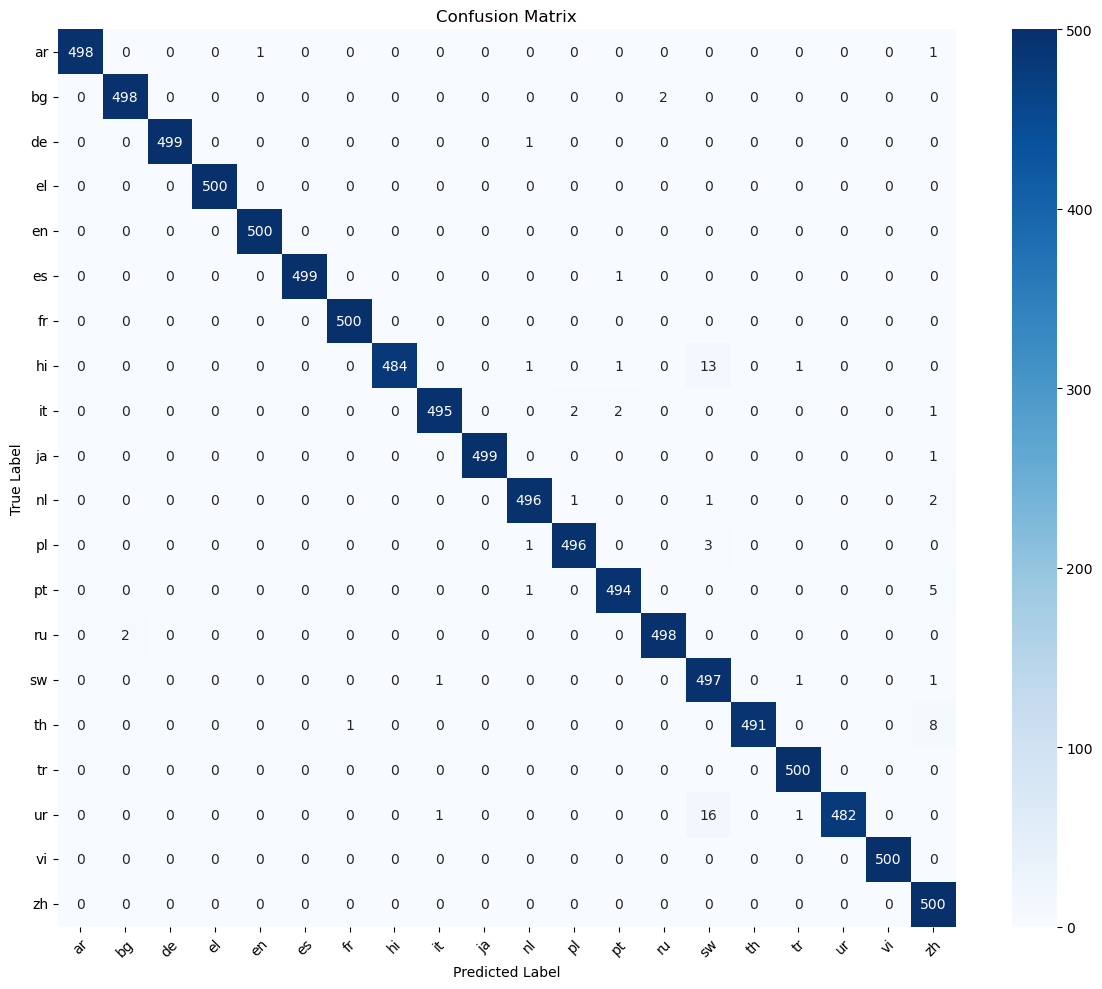

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
label_names = sorted(test_df['labels'].unique())
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
pipeline = make_pipeline(
    TfidfVectorizer(),
    SVC(kernel='linear')  # hoặc 'rbf', 'poly' tùy bạn
)

# Thực hiện cross-validation (5-fold)
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# In kết quả
print("Cross-Validation Scores (Accuracy):", scores)
print("Mean Accuracy: {:.4f}".format(np.mean(scores)))
print("Standard Deviation: {:.4f}".format(np.std(scores)))

Cross-Validation Scores (Accuracy): [0.93280661 0.93121195 0.93353146 0.93026964 0.93135692]
Mean Accuracy: 0.9318
Standard Deviation: 0.0012


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Danh sách các mô hình cần thử
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Chạy qua các mô hình và in kết quả
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()


--- Logistic Regression ---
Accuracy: 0.9914
Precision: 0.9917
Recall: 0.9914
F1 Score: 0.9914

--- SVM (Linear Kernel) ---
Accuracy: 0.9935
Precision: 0.9935
Recall: 0.9935
F1 Score: 0.9935

--- Random Forest ---
Accuracy: 0.9887
Precision: 0.9888
Recall: 0.9887
F1 Score: 0.9887

--- KNN ---
Accuracy: 0.9804
Precision: 0.9809
Recall: 0.9804
F1 Score: 0.9804



In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dung1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True